In [1]:
import os
train_path='/Users/nithinpathikonda/Downloads/archive-3/train'
test_path='/Users/nithinpathikonda/Downloads/archive-3/test'
len(os.listdir(test_path))

classes = [str(i) for i in range(23)]
classes_dict = {}

for i, label in enumerate(sorted(os.listdir(train_path))):
  classes_dict[i] = label

In [2]:

classes_dict
     

{0: '.DS_Store',
 1: 'Acne and Rosacea Photos',
 2: 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 3: 'Atopic Dermatitis Photos',
 4: 'Bullous Disease Photos',
 5: 'Cellulitis Impetigo and other Bacterial Infections',
 6: 'Eczema Photos',
 7: 'Exanthems and Drug Eruptions',
 8: 'Hair Loss Photos Alopecia and other Hair Diseases',
 9: 'Herpes HPV and other STDs Photos',
 10: 'Light Diseases and Disorders of Pigmentation',
 11: 'Lupus and other Connective Tissue diseases',
 12: 'Melanoma Skin Cancer Nevi and Moles',
 13: 'Nail Fungus and other Nail Disease',
 14: 'Poison Ivy Photos and other Contact Dermatitis',
 15: 'Psoriasis pictures Lichen Planus and related diseases',
 16: 'Scabies Lyme Disease and other Infestations and Bites',
 17: 'Seborrheic Keratoses and other Benign Tumors',
 18: 'Systemic Disease',
 19: 'Tinea Ringworm Candidiasis and other Fungal Infections',
 20: 'Urticaria Hives',
 21: 'Vascular Tumors',
 22: 'Vasculitis Photos',
 23: 'Warts Mollusc

In [3]:
!pwd

/Users/nithinpathikonda


In [5]:
!pip install resnet

In [8]:
pip install --upgrade keras


Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install keras-preprocessing

In [23]:
pip install --upgrade tensorflow keras


Note: you may need to restart the kernel to use updated packages.


Found 7644 images belonging to 8 classes.
Found 2016 images belonging to 8 classes.
Epoch 1/50
124/124 [==============================] - ETA: 0s - loss: 2.1313 - accuracy: 0.2291
Epoch 1: val_loss improved from inf to 2.43884, saving model to resnet_50epochs.h5
124/124 [==============================] - 248s 2s/step - loss: 2.1313 - accuracy: 0.2291 - val_loss: 2.4388 - val_accuracy: 0.0833 - lr: 0.0010
Epoch 2/50
124/124 [==============================] - ETA: 0s - loss: 1.8630 - accuracy: 0.2651
Epoch 2: val_loss improved from 2.43884 to 1.94992, saving model to resnet_50epochs.h5
124/124 [==============================] - 266s 2s/step - loss: 1.8630 - accuracy: 0.2651 - val_loss: 1.9499 - val_accuracy: 0.2008 - lr: 0.0010
Epoch 3/50
124/124 [==============================] - ETA: 0s - loss: 1.8488 - accuracy: 0.2767
Epoch 3: val_loss did not improve from 1.94992
124/124 [==============================] - 266s 2s/step - loss: 1.8488 - accuracy: 0.2767 - val_loss: 1.9617 - val_accura

124/124 [==============================] - 262s 2s/step - loss: 1.2183 - accuracy: 0.5545 - val_loss: 1.5056 - val_accuracy: 0.4735 - lr: 1.0000e-04
Epoch 28/50
124/124 [==============================] - ETA: 0s - loss: 1.2253 - accuracy: 0.5421
Epoch 28: val_loss did not improve from 1.34682
124/124 [==============================] - 267s 2s/step - loss: 1.2253 - accuracy: 0.5421 - val_loss: 1.3826 - val_accuracy: 0.4896 - lr: 1.0000e-04
Epoch 29/50
124/124 [==============================] - ETA: 0s - loss: 1.1958 - accuracy: 0.5563
Epoch 29: val_loss did not improve from 1.34682
124/124 [==============================] - 289s 2s/step - loss: 1.1958 - accuracy: 0.5563 - val_loss: 1.5298 - val_accuracy: 0.4432 - lr: 1.0000e-04
Epoch 30/50
124/124 [==============================] - ETA: 0s - loss: 1.1752 - accuracy: 0.5615
Epoch 30: val_loss did not improve from 1.34682
124/124 [==============================] - 275s 2s/step - loss: 1.1752 - accuracy: 0.5615 - val_loss: 1.5439 - val_acc

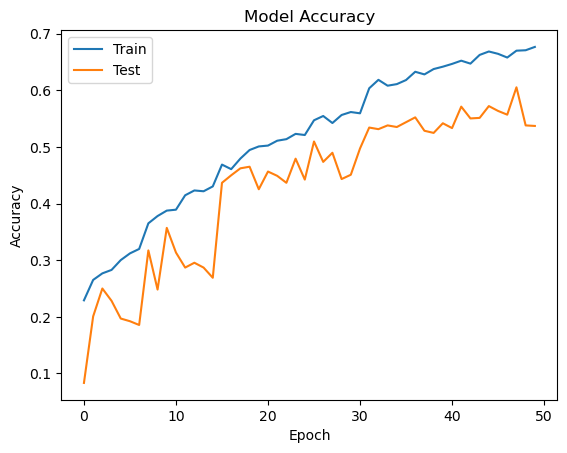

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Add, AveragePooling2D, Flatten
from tensorflow.keras.models import Model

# Define the classes and other variables
classes = ['Acne and Rosacea Photos',
           'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
           'Eczema Photos',
           'Melanoma Skin Cancer Nevi and Moles',
           'Psoriasis pictures Lichen Planus and related diseases', 
           'Tinea Ringworm Candidiasis and other Fungal Infections',
           'Urticaria Hives', 
           'Nail Fungus and other Nail Disease']

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
model_chkpt = ModelCheckpoint('resnet_50epochs.h5', monitor='val_loss', verbose=1, save_best_only=True)
batch_size = 32
nb_classes = 8
nb_epoch = 50
data_augmentation = True

# Input image dimensions
img_rows, img_cols = 224, 224  # Resize images to (224, 224)
img_channels = 3  # The CIFAR10 images are RGB.

train_path = 'Downloads/archive-3/train'
test_path = 'Downloads/archive-3/test'

# Augmentation configuration for training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Augmentation configuration for testing data
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load and prepare the training data
train_data = train_datagen.flow_from_directory(
    train_path,
    classes=classes,
    target_size=(img_rows, img_cols),
    batch_size=batch_size
)

# Load and prepare the testing data
test_data = test_datagen.flow_from_directory(
    test_path,
    classes=classes,
    target_size=(img_rows, img_cols),
    batch_size=batch_size
)

def resnet_block(inputs, filters, strides=1, activation='relu'):
    x = Conv2D(filters, kernel_size=3, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    
    x = Conv2D(filters, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    
    if strides > 1:
        residual = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(inputs)
    else:
        residual = inputs
    
    x = Add()([x, residual])
    x = Activation(activation)(x)
    return x

def ResNet18(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 128)
    x = resnet_block(x, 256, strides=2)
    x = resnet_block(x, 256)
    x = resnet_block(x, 512, strides=2)
    x = resnet_block(x, 512)
    
    x = AveragePooling2D(pool_size=7)(x)
    x = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Load the ResNet18 model
base_model = ResNet18(input_shape=(img_rows, img_cols, img_channels), num_classes=nb_classes)

# Compile the model
base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = base_model.fit(
    train_data,
    steps_per_epoch=124,
    validation_data=test_data,
    validation_steps=33,
    epochs=nb_epoch,
    verbose=1,
    callbacks=[lr_reducer, model_chkpt]
)

# Save the model
base_model.save('final_resnet18_epochs.h5')

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


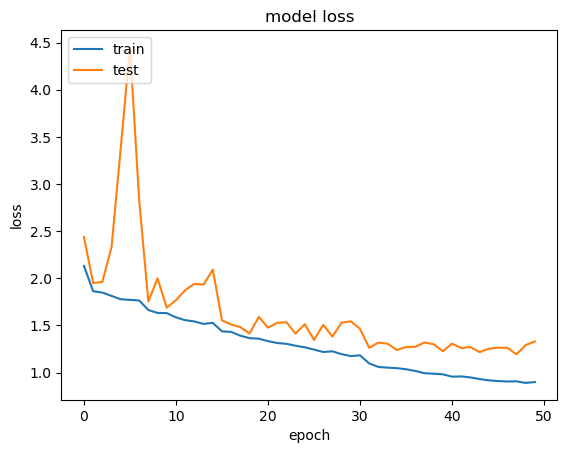

In [6]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
from keras.models import load_model

# Load the model
model = load_model('final_resnet50epochs.h5',compile=True)

# Fit the model
history = base_model.fit(
    train_data,
    steps_per_epoch=124,
    validation_data=test_data,
    validation_steps=33,
    epochs=20,
    verbose=1,
    callbacks=[lr_reducer, model_chkpt]
)

# Save the model
model.save('final_resnet70epochs.h5')



Epoch 1/20
124/124 [==============================] - ETA: 0s - loss: 0.8568 - accuracy: 0.6865
Epoch 1: val_loss did not improve from 1.19412
124/124 [==============================] - 232s 2s/step - loss: 0.8568 - accuracy: 0.6865 - val_loss: 1.2468 - val_accuracy: 0.5644 - lr: 3.1623e-05
Epoch 2/20
124/124 [==============================] - ETA: 0s - loss: 0.8348 - accuracy: 0.6955
Epoch 2: val_loss did not improve from 1.19412
124/124 [==============================] - 249s 2s/step - loss: 0.8348 - accuracy: 0.6955 - val_loss: 1.2898 - val_accuracy: 0.5360 - lr: 3.1623e-05
Epoch 3/20
124/124 [==============================] - ETA: 0s - loss: 0.8278 - accuracy: 0.6980
Epoch 3: val_loss did not improve from 1.19412
124/124 [==============================] - 253s 2s/step - loss: 0.8278 - accuracy: 0.6980 - val_loss: 1.3072 - val_accuracy: 0.5312 - lr: 3.1623e-05
Epoch 4/20
124/124 [==============================] - ETA: 0s - loss: 0.8335 - accuracy: 0.7038
Epoch 4: val_loss did not im

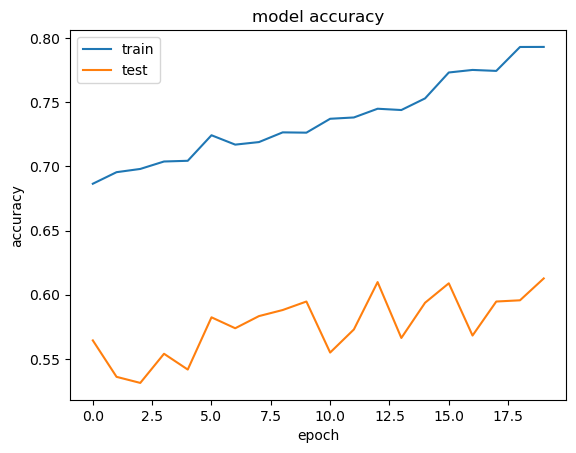

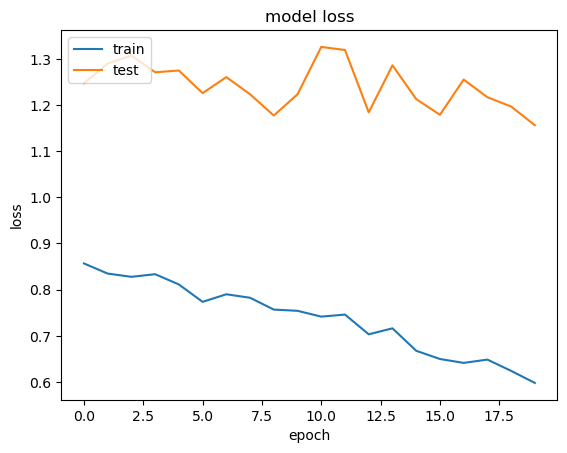

In [18]:



# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
req_model = load_model('final_resnet70epochs.h5', compile=True)

In [33]:
import cv2
img = 'Downloads/archive-3/test/Urticaria Hives/hives-Urticaria-Acute-73.jpg'
img = cv2.resize(cv2.imread(img), (32,32))/255
prediction = model.predict(img.reshape(1,32,32,3))
print(prediction)

1/1 [==============================] - 0s 22ms/step
[[0.0652822  0.03013307 0.29531372 0.00397909 0.18905923 0.15057081
  0.07392869 0.19173326]]


In [36]:

import cv2
img = 'Downloads/archive-3/test/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/actinic-cheilitis-sq-cell-lip-6.jpg'
img = cv2.resize(cv2.imread(img), (32,32))
re=img/255.0
prediction = model.predict(re.reshape(1,32,32,3))
print(prediction)
     

1/1 [==============================] - 0s 20ms/step
[[0.20337495 0.24026582 0.0901977  0.06768333 0.13023107 0.16228946
  0.0055009  0.10045668]]


In [35]:

import cv2
img = 'Downloads/archive-3/test/Tinea Ringworm Candidiasis and other Fungal Infections/tinea-body-109.jpg'
img = cv2.resize(cv2.imread(img), (32,32))/255
prediction = model.predict(img.reshape(1,32,32,3))
print(prediction)

1/1 [==============================] - 0s 20ms/step
[[0.13608871 0.18663038 0.16562046 0.04903089 0.20094983 0.20898478
  0.01816162 0.03453334]]


In [34]:

import cv2
img = 'Downloads/archive-3/test/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/actinic-cheilitis-sq-cell-lip-6.jpg'
img = cv2.resize(cv2.imread(img), (32,32))
re=img/255.0
prediction = model.predict(re.reshape(1,32,32,3))
print(prediction)
     

1/1 [==============================] - 0s 109ms/step
[[0.20337495 0.24026582 0.0901977  0.06768333 0.13023107 0.16228946
  0.0055009  0.10045668]]
